In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
file = "/Users/jwei/Downloads/cxc2025/4./investmentInCanadianRegions.csv"

In [137]:
df = pd.read_csv(file)

In [138]:
df

ecosystemName    month     amount            primaryTag
0     British Columbia  2019-01      70000                AdTech
1     British Columbia  2019-01          0                    AI
2     British Columbia  2019-01   14595900             CleanTech
3     British Columbia  2019-01    4000000                  SaaS
4                Other  2019-01          0                agTech
...                ...      ...        ...                   ...
2148   Waterloo Region  2025-01   58400000           DisplayTech
2149           Alberta  2025-02    1100000    Health Diagnostics
2150             Other  2025-02    3000000   Rail Transportation
2151            Quebec  2025-02    4400000  Software Development
2152           Toronto  2025-02  235000000                AdTech

[2153 rows x 4 columns]

# Step 1: Compare investment amounts by month in each Canadian Region
Look at amount for each region, and normalize all data to compare time of peak investment in each region

In [140]:
df_byregion = df.groupby(["ecosystemName", "month"], as_index=False)["amount"].sum()

In [141]:
# Convert 'month' to datetime and rename it to 'Date'
df_byregion["Date"] = pd.to_datetime(df_byregion["month"])

# Drop the old 'month' column
df_byregion.drop(columns=["month"], inplace=True)

# Display the DataFrame
df_byregion

ecosystemName     amount       Date
0            Alberta   16500000 2019-03-01
1            Alberta     600000 2019-04-01
2            Alberta    1000000 2019-05-01
3            Alberta    5750000 2019-06-01
4            Alberta   42672500 2019-07-01
..               ...        ...        ...
484  Waterloo Region    6248860 2024-06-01
485  Waterloo Region    2700000 2024-07-01
486  Waterloo Region  110200000 2024-09-01
487  Waterloo Region    4600000 2024-11-01
488  Waterloo Region   58400000 2025-01-01

[489 rows x 3 columns]

In [144]:
# Define a function for Min-Max Normalization
def min_max_normalize(group):
    group["amount_normalized"] = (group["amount"] - group["amount"].min()) / (group["amount"].max() - group["amount"].min())
    return group

# Apply the normalization for each ecosystemName separately
df_byregion_normalized = df_byregion.groupby("ecosystemName", group_keys=False).apply(min_max_normalize)

# Display the updated DataFrame
df_byregion_normalized

/var/folders/pg/c9t_krs943bdqvjb7qsws6hw0000gn/T/ipykernel_96643/3605584180.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_byregion_normalized = df_byregion.groupby("ecosystemName", group_keys=False).apply(min_max_normalize)


ecosystemName     amount       Date  amount_normalized
0            Alberta   16500000 2019-03-01           0.045119
1            Alberta     600000 2019-04-01           0.001641
2            Alberta    1000000 2019-05-01           0.002734
3            Alberta    5750000 2019-06-01           0.015723
4            Alberta   42672500 2019-07-01           0.116687
..               ...        ...        ...                ...
484  Waterloo Region    6248860 2024-06-01           0.008331
485  Waterloo Region    2700000 2024-07-01           0.003577
486  Waterloo Region  110200000 2024-09-01           0.147580
487  Waterloo Region    4600000 2024-11-01           0.006122
488  Waterloo Region   58400000 2025-01-01           0.078191

[489 rows x 4 columns]

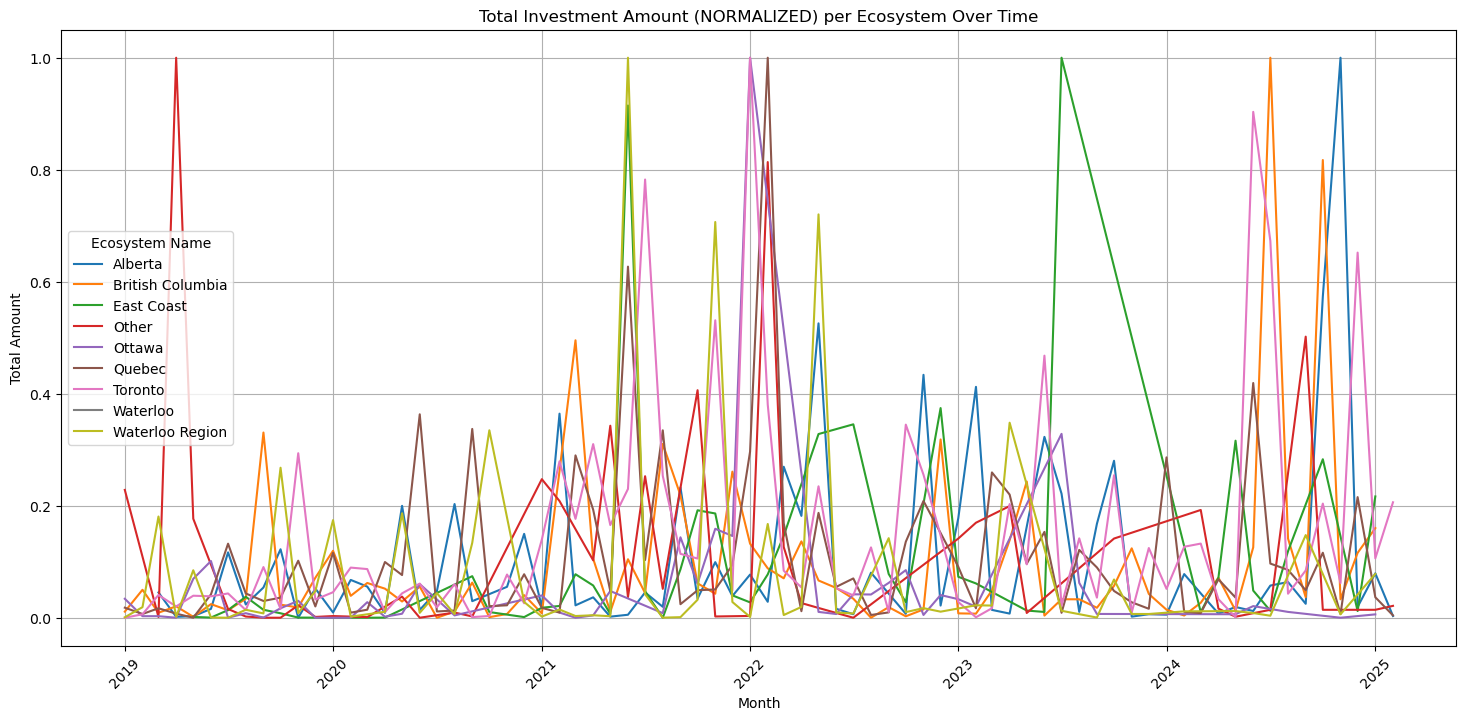

In [148]:
# Set the figure size
plt.figure(figsize=(18, 8))

# Plot the data using seaborn
sns.lineplot(data=df_byregion_normalized, x="Date", y="amount_normalized", hue="ecosystemName")

# Customize the plot
plt.title("Total Investment Amount (NORMALIZED) per Ecosystem Over Time")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Ecosystem Name")
plt.grid(True)

# Show the plot
plt.show()


# Step 2: Look at regional investments based on the categories

In [154]:
df

ecosystemName    month     amount            primaryTag
0     British Columbia  2019-01      70000                AdTech
1     British Columbia  2019-01          0                    AI
2     British Columbia  2019-01   14595900             CleanTech
3     British Columbia  2019-01    4000000                  SaaS
4                Other  2019-01          0                agTech
...                ...      ...        ...                   ...
2148   Waterloo Region  2025-01   58400000           DisplayTech
2149           Alberta  2025-02    1100000    Health Diagnostics
2150             Other  2025-02    3000000   Rail Transportation
2151            Quebec  2025-02    4400000  Software Development
2152           Toronto  2025-02  235000000                AdTech

[2153 rows x 4 columns]

In [156]:
# Count number of investments in each region for each month for each primaryTag to determine which are the most popular
# Additionally, could sum the total investment amount for each month, primaryTag, and region (this could be skewed by one large investment though)
# Determine which regions are favourable for each industry

UsageError: Cell magic `%%sql` not found.
